# Import Libraries

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns

# Read Dataset

In [95]:
df = pd.read_csv("master_master.csv")
df

,Penghasilan_setelah_dipotong_pajak,Kondisi_Agunan,Asuransi_Agunan,Status_Lunas_Agunan,Jumlah_Agunan,Nilai_Agunan,Mutasi_Rekening,id,dp_id,arsip_id,...,tagihan_air,tagihan_sekolah_anak,pbb(pajak_bumi_bangunan),zakat,donasi_dan_dana_bantuan,retribusi_warga,arisan_dan_sumbangan_musiman,tapera,pajak_penghasilan_dan_ppn,pungutan_yang_bersumber_dari_keluarga_terdekat
0,5412319.10,Kuat,True,Lunas,5.0,743014120.0,1.070851,1.0,405323.0,0.0,...,>1.200.000,900.000-1.200.000,10.000.000-15.000.000,0-50.000,100.000-150.000,0-300.000,900.000-1.200.000,170915.34,0.0,300.000-600.000
1,6503864.35,Cukup,False,Lunas,8.0,2035637.0,-0.676608,2.0,405324.0,0.0,...,900.000-1.200.000,300.000-600.000,5.000.000-10.000.000,0-50.000,>200.000,600.000-900.000,600.000-900.000,205385.19,0.0,900.000-1.200.000
2,11024383.30,Kuat,True,Belum Lunas,7.0,6898168.0,1.136823,3.0,405325.0,0.0,...,0-300.000,300.000-600.000,5.000.000-10.000.000,>200.000,>200.000,>1.200.000,>1.200.000,348138.42,0.0,900.000-1.200.000
3,5338621.90,Meragukan,False,Lunas,9.0,968029.0,-0.553126,4.0,405326.0,0.0,...,300.000-600.000,600.000-900.000,15.000.000-20.000.000,100.000-150.000,100.000-150.000,600.000-900.000,300.000-600.000,168588.06,0.0,900.000-1.200.000
4,6059669.05,Resiko Tinggi,True,Lunas,4.0,74985366.0,-0.301118,5.0,405327.0,0.0,...,300.000-600.000,900.000-1.200.000,0-5.000.000,50.000-100.000,150.000-200.000,0-300.000,0-300.000,191357.97,0.0,900.000-1.200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,8311060.75,Sangat Lemah,True,Lunas,3.0,409908.0,1.383209,499996.0,79473.0,0.0,...,300.000-600.000,>1.200.000,15.000.000-20.000.000,100.000-150.000,150.000-200.000,0-300.000,300.000-600.000,262454.55,0.0,600.000-900.000
499996,0.00,Meragukan,True,Belum Lunas,9.0,20919172.0,1.693112,499997.0,79474.0,0.0,...,600.000-900.000,300.000-600.000,5.000.000-10.000.000,>200.000,150.000-200.000,>1.200.000,0-300.000,0.00,0.0,>1.200.000
499997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,600.000-900.000,600.000-900.000,5.000.000-10.000.000,150.000-200.000,100.000-150.000,600.000-900.000,600.000-900.000,NaN,0.0,900.000-1.200.000
499998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,>1.200.000,900.000-1.200.000,0-5.000.000,0-50.000,0-50.000,900.000-1.200.000,0-300.000,NaN,0.0,300.000-600.000


In [96]:
df.describe()

,Penghasilan_setelah_dipotong_pajak,Jumlah_Agunan,Nilai_Agunan,Mutasi_Rekening,id,dp_id,arsip_id,synced,invalid,sync_id,...,Modal_barang,Surat_berharga,Laporan_keuangan_aset,Aset_Maya,Pinjaman_dapat_diberikan,kenaikan_nilai_property_agunan,status_agunan_terburuk,tagihan_kesehatan_bpjs,tapera,pajak_penghasilan_dan_ppn
count,4.999970e+05,499997.000000,4.999970e+05,4.999970e+05,499997.000000,499997.000000,499997.0,499997.0,499997.0,499997.000000,...,4.297430e+05,499997.0,499997.0,499997.000000,499997.000000,499997.000000,500000.0,500000.000000,4.999970e+05,500000.0
mean,1.126605e+07,5.504119,1.392669e+08,4.094882e-17,249999.000000,447115.142535,0.0,0.0,0.0,106.050114,...,-8.779624e-17,1.0,1.0,0.499853,0.989478,9.988830,0.0,97335.016000,3.629228e+05,0.0
std,1.303834e+07,2.869573,2.552059e+08,1.000001e+00,144336.845609,215531.198130,0.0,0.0,0.0,45.645613,...,1.000001e+00,0.0,0.0,1.118465,0.102036,6.046734,0.0,44150.995809,4.408569e+05,0.0
min,0.000000e+00,1.000000,1.000000e+00,-1.731716e+00,1.000000,17260.000000,0.0,0.0,0.0,46.000000,...,-1.735563e+00,1.0,1.0,-1.000000,0.000000,0.000000,0.0,42000.000000,0.000000e+00,0.0
25%,4.294494e+06,3.000000,8.996670e+05,-8.655878e-01,125000.000000,366791.000000,0.0,0.0,0.0,84.000000,...,-8.653928e-01,1.0,1.0,-1.000000,1.000000,5.000000,0.0,42000.000000,1.356156e+05,0.0
50%,6.903445e+06,6.000000,9.002788e+06,-7.125800e-04,249999.000000,491790.000000,0.0,0.0,0.0,94.000000,...,1.514687e-03,1.0,1.0,0.000000,1.000000,10.000000,0.0,100000.000000,2.180035e+05,0.0
75%,1.165101e+07,8.000000,9.103483e+07,8.669548e-01,374998.000000,616789.000000,0.0,0.0,0.0,132.000000,...,8.663372e-01,1.0,1.0,2.000000,1.000000,15.000000,0.0,150000.000000,3.679266e+05,0.0
max,8.499998e+07,10.000000,9.999988e+08,1.733794e+00,499997.000000,741788.000000,0.0,0.0,0.0,359.000000,...,1.728674e+00,1.0,1.0,2.000000,1.000000,20.000000,0.0,150000.000000,2.999999e+06,0.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 333 entries, Penghasilan_setelah_dipotong_pajak to pungutan_yang_bersumber_dari_keluarga_terdekat
dtypes: float64(94), int64(1), object(238)
memory usage: 1.2+ GB


In [98]:
# Mengubah semua kolom menjadi huruf kecil
df.columns = df.columns.str.lower()

# Menampilkan DataFrame
print(df)

        penghasilan_setelah_dipotong_pajak kondisi_agunan asuransi_agunan  \
0                               5412319.10           Kuat            True   
1                               6503864.35          Cukup           False   
2                              11024383.30           Kuat            True   
3                               5338621.90      Meragukan           False   
4                               6059669.05  Resiko Tinggi            True   
...                                    ...            ...             ...   
499995                          8311060.75   Sangat Lemah            True   
499996                                0.00      Meragukan            True   
499997                                 NaN            NaN             NaN   
499998                                 NaN            NaN             NaN   
499999                                 NaN            NaN             NaN   

       status_lunas_agunan  jumlah_agunan  nilai_agunan  mutasi_rekening  \

# Data Preparation

In [99]:
# Daftar kolom yang ingin disertakan dalam DataFrame baru
kolom_dipilih = [
    "pekerjaan", "tujuan_pinjaman", "agunan", "tipe_agunan", "status_agunan_terburuk",
    "kondisi_agunan", "asuransi_agunan", "status_lunas_agunan", "jumlah_agunan",
    "nilai_agunan", "tenor", "usia_agunan", "agunan_dibanyak_pinjaman", "merk_aset",
    "kesediaan_untuk_digadaikan", "jenis_asset_bergerak_atau_tidak", "aset_maya",
    "riwayat_agunan_sebelumnya", "kemudahan_dijual_kembali", "kenaikan_nilai_property_agunan",
    "status_kepemilikan_asset", "surat_berharga"
]

# Memastikan kolom-kolom tersebut ada di DataFrame, jika tidak tambahkan dengan nilai None
for kolom in kolom_dipilih:
    if kolom not in df.columns:
        df[kolom] = None

# Membuat DataFrame baru hanya dengan kolom yang dipilih
df_baru = df[kolom_dipilih]

# Menghapus kolom duplikat
df_baru = df_baru.loc[:, ~df_baru.columns.duplicated()]

df_baru

,pekerjaan,tujuan_pinjaman,agunan,tipe_agunan,status_agunan_terburuk,kondisi_agunan,asuransi_agunan,status_lunas_agunan,jumlah_agunan,nilai_agunan,...,agunan_dibanyak_pinjaman,merk_aset,kesediaan_untuk_digadaikan,jenis_asset_bergerak_atau_tidak,aset_maya,riwayat_agunan_sebelumnya,kemudahan_dijual_kembali,kenaikan_nilai_property_agunan,status_kepemilikan_asset,surat_berharga
0,Petugas_Keamanan,Bisnis/Usaha,Tanah,berwujud,0.0,Kuat,True,Lunas,5.0,743014120.0,...,None,None,None,None,-1.0,Tidak Pernah,sangat lemah,0.0,None,1.0
1,Pegawai_Negeri_Sipil,Gaya Hidup,Rekening Tabungan dan Deposito,berwujud,0.0,Cukup,False,Lunas,8.0,2035637.0,...,None,None,None,None,-1.0,Tidak Pernah,lemah,13.0,None,1.0
2,Akuntan/Akuntan_Publik/Auditor,Bisnis/Usaha,Mesin dan Peralatan,berwujud,0.0,Kuat,True,Belum Lunas,7.0,6898168.0,...,None,None,None,None,2.0,Tidak Pernah,meragukan,20.0,None,1.0
3,Kru_Kapal/Pesawat,Gaya Hidup,Piutang Usaha,tak berwujud,0.0,Meragukan,False,Lunas,9.0,968029.0,...,None,None,None,None,1.0,Pernah,cukup,6.0,None,1.0
4,Wartawan/Reporter/Jurnalis/Editor,Bisnis/Usaha,Hak Kekayaan Intelektual,tak berwujud,0.0,Resiko Tinggi,True,Lunas,4.0,74985366.0,...,None,None,None,None,-1.0,Tidak Pernah,sangat kuat,8.0,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Kru_Kapal/Pesawat,Pendidikan,Piutang Usaha,tak berwujud,0.0,Sangat Lemah,True,Lunas,3.0,409908.0,...,None,None,None,None,0.0,Tidak Pernah,lemah,10.0,None,1.0
499996,Tidak_Bekerja,Kesehatan,Tanah,berwujud,0.0,Meragukan,True,Belum Lunas,9.0,20919172.0,...,None,None,None,None,2.0,Pernah,meragukan,20.0,None,1.0
499997,NaN,Pendidikan,Rumah,berwujud,0.0,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN
499998,NaN,Tempat Tinggal,Bangunan,berwujud,0.0,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN


In [100]:
categories = {
    'tipe_agunan': ['Tak berwujud', 'Berwujud'],
    'kondisi_agunan': ['Resiko Tinggi', 'Sangat Lemah', 'Lemah', 'Meragukan', 'Cukup', 'Kuat', 'Sangat Kuat'],
    'kemudahan_dijual_kembali': ['Resiko Tinggi', 'Sangat Lemah', 'Lemah', 'Meragukan', 'Cukup', 'Kuat', 'Sangat Kuat'],
    'status_lunas_agunan': ['Belum Lunas', 'Lunas'],
    'agunan_dibanyak_pinjaman': ['Tidak', 'Ya'],
    'kesediaan_untuk_digadaikan': ['Tidak', 'Ya'],
    'jenis_asset_bergerak_atau_tidak': ['Tidak', 'Ya'],
    'riwayat_agunan_sebelumnya': ['Tidak Pernah', 'Pernah'],
    'status_kepemilikan_asset': ['Non-Pribadi', 'Pribadi'],
}

# Fungsi untuk mengubah kapitalisasi berdasarkan mapping
def standardize_values(df, mapping):
    for col, cat_list in mapping.items():
        df[col] = df[col].str.lower().map({v.lower(): v for v in cat_list})
    return df

# Terapkan fungsi pada dataset
df_baru = standardize_values(df_baru, categories)

(df_baru)

,pekerjaan,tujuan_pinjaman,agunan,tipe_agunan,status_agunan_terburuk,kondisi_agunan,asuransi_agunan,status_lunas_agunan,jumlah_agunan,nilai_agunan,...,agunan_dibanyak_pinjaman,merk_aset,kesediaan_untuk_digadaikan,jenis_asset_bergerak_atau_tidak,aset_maya,riwayat_agunan_sebelumnya,kemudahan_dijual_kembali,kenaikan_nilai_property_agunan,status_kepemilikan_asset,surat_berharga
0,Petugas_Keamanan,Bisnis/Usaha,Tanah,Berwujud,0.0,Kuat,True,Lunas,5.0,743014120.0,...,NaN,NaN,NaN,NaN,-1.0,Tidak Pernah,Sangat Lemah,0.0,NaN,1.0
1,Pegawai_Negeri_Sipil,Gaya Hidup,Rekening Tabungan dan Deposito,Berwujud,0.0,Cukup,False,Lunas,8.0,2035637.0,...,NaN,NaN,NaN,NaN,-1.0,Tidak Pernah,Lemah,13.0,NaN,1.0
2,Akuntan/Akuntan_Publik/Auditor,Bisnis/Usaha,Mesin dan Peralatan,Berwujud,0.0,Kuat,True,Belum Lunas,7.0,6898168.0,...,NaN,NaN,NaN,NaN,2.0,Tidak Pernah,Meragukan,20.0,NaN,1.0
3,Kru_Kapal/Pesawat,Gaya Hidup,Piutang Usaha,Tak berwujud,0.0,Meragukan,False,Lunas,9.0,968029.0,...,NaN,NaN,NaN,NaN,1.0,Pernah,Cukup,6.0,NaN,1.0
4,Wartawan/Reporter/Jurnalis/Editor,Bisnis/Usaha,Hak Kekayaan Intelektual,Tak berwujud,0.0,Resiko Tinggi,True,Lunas,4.0,74985366.0,...,NaN,NaN,NaN,NaN,-1.0,Tidak Pernah,Sangat Kuat,8.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Kru_Kapal/Pesawat,Pendidikan,Piutang Usaha,Tak berwujud,0.0,Sangat Lemah,True,Lunas,3.0,409908.0,...,NaN,NaN,NaN,NaN,0.0,Tidak Pernah,Lemah,10.0,NaN,1.0
499996,Tidak_Bekerja,Kesehatan,Tanah,Berwujud,0.0,Meragukan,True,Belum Lunas,9.0,20919172.0,...,NaN,NaN,NaN,NaN,2.0,Pernah,Meragukan,20.0,NaN,1.0
499997,NaN,Pendidikan,Rumah,Berwujud,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499998,NaN,Tempat Tinggal,Bangunan,Berwujud,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Menampilkan daftar kolom pada DataFrame baru
print(df_baru.columns)

Index(['pekerjaan', 'tujuan_pinjaman', 'agunan', 'tipe_agunan',
       'status_agunan_terburuk', 'kondisi_agunan', 'asuransi_agunan',
       'status_lunas_agunan', 'jumlah_agunan', 'nilai_agunan', 'tenor',
       'usia_agunan', 'agunan_dibanyak_pinjaman', 'merk_aset',
       'kesediaan_untuk_digadaikan', 'jenis_asset_bergerak_atau_tidak',
       'aset_maya', 'riwayat_agunan_sebelumnya', 'kemudahan_dijual_kembali',
       'kenaikan_nilai_property_agunan', 'status_kepemilikan_asset',
       'surat_berharga'],
      dtype='object')


In [102]:
# Menampilkan nilai unik dari setiap kolom
for kolom in df_baru.columns:
    print(f"Nilai unik untuk kolom '{kolom}':")
    print(df_baru[kolom].unique())
    print("\n")

Nilai unik untuk kolom 'pekerjaan':
['Petugas_Keamanan' 'Pegawai_Negeri_Sipil'
 'Akuntan/Akuntan_Publik/Auditor' 'Kru_Kapal/Pesawat'
 'Wartawan/Reporter/Jurnalis/Editor' 'Pegawai_Toko'
 'Anggota_Parlemen_(DPRD,_DPD,_MPR)' 'Ibu_Rumah_Tangga' 'Karyawan_Kontrak'
 'Karyawan_Tetap' 'Direktur_Utama_/_Presiden_Komisaris'
 'Sales/_agen_penjualan_/_pemasaran' 'Tidak_Bekerja'
 'Pekerjaan_Bangunan/Pabrik/Tambang/Operator_Mesin/Teknisi/Montir'
 'Wiraswasta' 'Staf_penjualan_dan_pemasaran'
 'Driver/Pengemudi/Supir/Kurir'
 'Pengacara/Konsultan_Hukum/Pejabat_di_Pengadilan'
 'Supervisor/asisten_manager' 'Konsultan/Kontraktor/Arsitek' 'TNI/Polri'
 'Aktor/Publik_Figur/Musisi' 'Manager/eksekutif'
 'Staf_administrasi_resepsionanis_sekretaris'
 'Pekerjaan_Profesional_Lainnya' 'Notaris' 'Professional/Agen/Mitra'
 'Pelajar' 'Pemilik/Owner/Self-emplyment' 'Direktur_/_Komisaris'
 'Petugas_Kebersihan' 'Staf_Lainnya'
 'Staf_bagian_penagihan_kredit_di_bank' 'Dokter' 'Pensiunan' nan]


Nilai unik untuk kolom 'tujua

In [103]:
import random
# Menambahkan nilai acak yang masuk akal berdasarkan kolom 'tujuan_pinjaman'
def isi_nilai_random(row):
    if row['tujuan_pinjaman'] == 'Bisnis/Usaha':
        row['tenor'] = random.randint(12, 60)
        row['usia_agunan'] = random.randint(1, 10)
        row['agunan_dibanyak_pinjaman'] = random.choice(['Ya', 'Tidak'])
        row['merk_aset'] = random.choice(['Merk_A', 'Merk_B', 'Merk_C'])
        row['kesediaan_untuk_digadaikan'] = random.choice(['Ya', 'Tidak'])
        row['jenis_asset_bergerak_atau_tidak'] = random.choice(['Ya', 'Tidak'])
        row['status_kepemilikan_asset'] = random.choice(['Pribadi', 'Non-Pribadi'])
    elif row['tujuan_pinjaman'] == 'Gaya Hidup':
        row['tenor'] = random.randint(6, 24)
        row['usia_agunan'] = random.randint(1, 5)
        row['agunan_dibanyak_pinjaman'] = random.choice(['Ya', 'Tidak'])
        row['merk_aset'] = random.choice(['Merk_D', 'Merk_E'])
        row['kesediaan_untuk_digadaikan'] = random.choice(['Ya', 'Tidak'])
        row['jenis_asset_bergerak_atau_tidak'] = random.choice(['Ya', 'Tidak'])
        row['status_kepemilikan_asset'] = random.choice(['Pribadi', 'Non-Pribadi'])
    elif row['tujuan_pinjaman'] == 'Tempat Tinggal':
        row['tenor'] = random.randint(24, 120)
        row['usia_agunan'] = random.randint(5, 20)
        row['agunan_dibanyak_pinjaman'] = random.choice(['Ya', 'Tidak'])
        row['merk_aset'] = random.choice(['Merk_F', 'Merk_G'])
        row['kesediaan_untuk_digadaikan'] = random.choice(['Ya', 'Tidak'])
        row['jenis_asset_bergerak_atau_tidak'] = random.choice(['Ya', 'Tidak'])
        row['status_kepemilikan_asset'] = random.choice(['Pribadi', 'Non-Pribadi'])
    elif row['tujuan_pinjaman'] == 'Pendidikan':
        row['tenor'] = random.randint(12, 48)
        row['usia_agunan'] = random.randint(1, 3)
        row['agunan_dibanyak_pinjaman'] = random.choice(['Ya', 'Tidak'])
        row['merk_aset'] = random.choice(['Merk_H', 'Merk_I'])
        row['kesediaan_untuk_digadaikan'] = random.choice(['Ya', 'Tidak'])
        row['jenis_asset_bergerak_atau_tidak'] = random.choice(['Ya', 'Tidak'])
        row['status_kepemilikan_asset'] = random.choice(['Pribadi', 'Non-Pribadi'])
    elif row['tujuan_pinjaman'] == 'Kesehatan':
        row['tenor'] = random.randint(6, 24)
        row['usia_agunan'] = random.randint(1, 2)
        row['agunan_dibanyak_pinjaman'] = random.choice(['Ya', 'Tidak'])
        row['merk_aset'] = random.choice(['Merk_J', 'Merk_K'])
        row['kesediaan_untuk_digadaikan'] = random.choice(['Ya', 'Tidak'])
        row['jenis_asset_bergerak_atau_tidak'] = random.choice(['Ya', 'Tidak'])
        row['status_kepemilikan_asset'] = random.choice(['Pribadi', 'Non-Pribadi'])
    return row

# Menerapkan fungsi untuk mengisi nilai acak
df_baru = df_baru.apply(isi_nilai_random, axis=1)

# Menampilkan DataFrame baru dengan nilai yang telah diisi
print(df_baru.head())

                           pekerjaan tujuan_pinjaman  \
0                   Petugas_Keamanan    Bisnis/Usaha   
1               Pegawai_Negeri_Sipil      Gaya Hidup   
2     Akuntan/Akuntan_Publik/Auditor    Bisnis/Usaha   
3                  Kru_Kapal/Pesawat      Gaya Hidup   
4  Wartawan/Reporter/Jurnalis/Editor    Bisnis/Usaha   

                           agunan   tipe_agunan  status_agunan_terburuk  \
0                           Tanah      Berwujud                     0.0   
1  Rekening Tabungan dan Deposito      Berwujud                     0.0   
2             Mesin dan Peralatan      Berwujud                     0.0   
3                   Piutang Usaha  Tak berwujud                     0.0   
4        Hak Kekayaan Intelektual  Tak berwujud                     0.0   

  kondisi_agunan asuransi_agunan status_lunas_agunan  jumlah_agunan  \
0           Kuat            True               Lunas            5.0   
1          Cukup           False               Lunas            8.0   

In [104]:
# Menampilkan nilai unik dari setiap kolom
for kolom in df_baru.columns:
    print(f"Nilai unik untuk kolom '{kolom}':")
    print(df_baru[kolom].unique())
    print("\n")

Nilai unik untuk kolom 'pekerjaan':
['Petugas_Keamanan' 'Pegawai_Negeri_Sipil'
 'Akuntan/Akuntan_Publik/Auditor' 'Kru_Kapal/Pesawat'
 'Wartawan/Reporter/Jurnalis/Editor' 'Pegawai_Toko'
 'Anggota_Parlemen_(DPRD,_DPD,_MPR)' 'Ibu_Rumah_Tangga' 'Karyawan_Kontrak'
 'Karyawan_Tetap' 'Direktur_Utama_/_Presiden_Komisaris'
 'Sales/_agen_penjualan_/_pemasaran' 'Tidak_Bekerja'
 'Pekerjaan_Bangunan/Pabrik/Tambang/Operator_Mesin/Teknisi/Montir'
 'Wiraswasta' 'Staf_penjualan_dan_pemasaran'
 'Driver/Pengemudi/Supir/Kurir'
 'Pengacara/Konsultan_Hukum/Pejabat_di_Pengadilan'
 'Supervisor/asisten_manager' 'Konsultan/Kontraktor/Arsitek' 'TNI/Polri'
 'Aktor/Publik_Figur/Musisi' 'Manager/eksekutif'
 'Staf_administrasi_resepsionanis_sekretaris'
 'Pekerjaan_Profesional_Lainnya' 'Notaris' 'Professional/Agen/Mitra'
 'Pelajar' 'Pemilik/Owner/Self-emplyment' 'Direktur_/_Komisaris'
 'Petugas_Kebersihan' 'Staf_Lainnya'
 'Staf_bagian_penagihan_kredit_di_bank' 'Dokter' 'Pensiunan' nan]


Nilai unik untuk kolom 'tujua

In [105]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pekerjaan                        499997 non-null  object 
 1   tujuan_pinjaman                  500000 non-null  object 
 2   agunan                           500000 non-null  object 
 3   tipe_agunan                      500000 non-null  object 
 4   status_agunan_terburuk           500000 non-null  float64
 5   kondisi_agunan                   499997 non-null  object 
 6   asuransi_agunan                  499997 non-null  object 
 7   status_lunas_agunan              499997 non-null  object 
 8   jumlah_agunan                    499997 non-null  float64
 9   nilai_agunan                     499997 non-null  float64
 10  tenor                            500000 non-null  int64  
 11  usia_agunan                      500000 non-null  int64  
 12  ag

In [106]:
df_baru.isnull().sum()

pekerjaan                          3
tujuan_pinjaman                    0
agunan                             0
tipe_agunan                        0
status_agunan_terburuk             0
kondisi_agunan                     3
asuransi_agunan                    3
status_lunas_agunan                3
jumlah_agunan                      3
nilai_agunan                       3
tenor                              0
usia_agunan                        0
agunan_dibanyak_pinjaman           0
merk_aset                          0
kesediaan_untuk_digadaikan         0
jenis_asset_bergerak_atau_tidak    0
aset_maya                          3
riwayat_agunan_sebelumnya          3
kemudahan_dijual_kembali           3
kenaikan_nilai_property_agunan     3
status_kepemilikan_asset           0
surat_berharga                     3
dtype: int64

In [107]:
# Menghapus baris yang memiliki nilai null
df_baru = df_baru.dropna()
df_baru.isnull().sum()


pekerjaan                          0
tujuan_pinjaman                    0
agunan                             0
tipe_agunan                        0
status_agunan_terburuk             0
kondisi_agunan                     0
asuransi_agunan                    0
status_lunas_agunan                0
jumlah_agunan                      0
nilai_agunan                       0
tenor                              0
usia_agunan                        0
agunan_dibanyak_pinjaman           0
merk_aset                          0
kesediaan_untuk_digadaikan         0
jenis_asset_bergerak_atau_tidak    0
aset_maya                          0
riwayat_agunan_sebelumnya          0
kemudahan_dijual_kembali           0
kenaikan_nilai_property_agunan     0
status_kepemilikan_asset           0
surat_berharga                     0
dtype: int64

In [108]:
# Menampilkan nilai unik dari setiap kolom
for kolom in df_baru.columns:
    print(f"Nilai unik untuk kolom '{kolom}':")
    print(df_baru[kolom].unique())
    print("\n")

Nilai unik untuk kolom 'pekerjaan':
['Petugas_Keamanan' 'Pegawai_Negeri_Sipil'
 'Akuntan/Akuntan_Publik/Auditor' 'Kru_Kapal/Pesawat'
 'Wartawan/Reporter/Jurnalis/Editor' 'Pegawai_Toko'
 'Anggota_Parlemen_(DPRD,_DPD,_MPR)' 'Ibu_Rumah_Tangga' 'Karyawan_Kontrak'
 'Karyawan_Tetap' 'Direktur_Utama_/_Presiden_Komisaris'
 'Sales/_agen_penjualan_/_pemasaran' 'Tidak_Bekerja'
 'Pekerjaan_Bangunan/Pabrik/Tambang/Operator_Mesin/Teknisi/Montir'
 'Wiraswasta' 'Staf_penjualan_dan_pemasaran'
 'Driver/Pengemudi/Supir/Kurir'
 'Pengacara/Konsultan_Hukum/Pejabat_di_Pengadilan'
 'Supervisor/asisten_manager' 'Konsultan/Kontraktor/Arsitek' 'TNI/Polri'
 'Aktor/Publik_Figur/Musisi' 'Manager/eksekutif'
 'Staf_administrasi_resepsionanis_sekretaris'
 'Pekerjaan_Profesional_Lainnya' 'Notaris' 'Professional/Agen/Mitra'
 'Pelajar' 'Pemilik/Owner/Self-emplyment' 'Direktur_/_Komisaris'
 'Petugas_Kebersihan' 'Staf_Lainnya'
 'Staf_bagian_penagihan_kredit_di_bank' 'Dokter' 'Pensiunan']


Nilai unik untuk kolom 'tujuan_pi

In [109]:
df_baru

,pekerjaan,tujuan_pinjaman,agunan,tipe_agunan,status_agunan_terburuk,kondisi_agunan,asuransi_agunan,status_lunas_agunan,jumlah_agunan,nilai_agunan,...,agunan_dibanyak_pinjaman,merk_aset,kesediaan_untuk_digadaikan,jenis_asset_bergerak_atau_tidak,aset_maya,riwayat_agunan_sebelumnya,kemudahan_dijual_kembali,kenaikan_nilai_property_agunan,status_kepemilikan_asset,surat_berharga
0,Petugas_Keamanan,Bisnis/Usaha,Tanah,Berwujud,0.0,Kuat,True,Lunas,5.0,743014120.0,...,Ya,Merk_B,Ya,Tidak,-1.0,Tidak Pernah,Sangat Lemah,0.0,Pribadi,1.0
1,Pegawai_Negeri_Sipil,Gaya Hidup,Rekening Tabungan dan Deposito,Berwujud,0.0,Cukup,False,Lunas,8.0,2035637.0,...,Ya,Merk_D,Tidak,Tidak,-1.0,Tidak Pernah,Lemah,13.0,Non-Pribadi,1.0
2,Akuntan/Akuntan_Publik/Auditor,Bisnis/Usaha,Mesin dan Peralatan,Berwujud,0.0,Kuat,True,Belum Lunas,7.0,6898168.0,...,Tidak,Merk_B,Ya,Tidak,2.0,Tidak Pernah,Meragukan,20.0,Non-Pribadi,1.0
3,Kru_Kapal/Pesawat,Gaya Hidup,Piutang Usaha,Tak berwujud,0.0,Meragukan,False,Lunas,9.0,968029.0,...,Ya,Merk_E,Ya,Ya,1.0,Pernah,Cukup,6.0,Non-Pribadi,1.0
4,Wartawan/Reporter/Jurnalis/Editor,Bisnis/Usaha,Hak Kekayaan Intelektual,Tak berwujud,0.0,Resiko Tinggi,True,Lunas,4.0,74985366.0,...,Ya,Merk_B,Tidak,Ya,-1.0,Tidak Pernah,Sangat Kuat,8.0,Non-Pribadi,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499992,Staf_Lainnya,Kesehatan,Rekening Tabungan dan Deposito,Berwujud,0.0,Cukup,True,Belum Lunas,6.0,264401.0,...,Ya,Merk_J,Tidak,Tidak,2.0,Tidak Pernah,Lemah,18.0,Non-Pribadi,1.0
499993,Petugas_Keamanan,Pendidikan,Asuransi Jiwa,Tak berwujud,0.0,Kuat,True,Lunas,4.0,77810232.0,...,Ya,Merk_H,Ya,Ya,0.0,Pernah,Kuat,6.0,Pribadi,1.0
499994,Pensiunan,Tempat Tinggal,Kendaraan,Berwujud,0.0,Sangat Lemah,True,Lunas,3.0,381085568.0,...,Tidak,Merk_G,Tidak,Ya,0.0,Tidak Pernah,Lemah,10.0,Non-Pribadi,1.0
499995,Kru_Kapal/Pesawat,Pendidikan,Piutang Usaha,Tak berwujud,0.0,Sangat Lemah,True,Lunas,3.0,409908.0,...,Tidak,Merk_I,Tidak,Ya,0.0,Tidak Pernah,Lemah,10.0,Non-Pribadi,1.0


In [110]:
# Menyimpan data asli sebelum pre-processing
df_baru_original = df_baru.copy()

In [111]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Kolom-kolom untuk ordinal encoding
ordinal_columns = ['tipe_agunan', 'kondisi_agunan', 'kemudahan_dijual_kembali', 'status_lunas_agunan',
                   'agunan_dibanyak_pinjaman', 'kesediaan_untuk_digadaikan', 'jenis_asset_bergerak_atau_tidak',
                   'riwayat_agunan_sebelumnya', 'status_kepemilikan_asset', 'asuransi_agunan']

# Kolom-kolom untuk label encoding
nominal_columns = ['pekerjaan', 'tujuan_pinjaman', 'agunan', 'merk_aset']

# Mapping untuk ordinal encoding
categories = {
    'tipe_agunan': ['Tak berwujud', 'Berwujud'],
    'kondisi_agunan': ['Resiko Tinggi', 'Sangat Lemah', 'Lemah', 'Meragukan', 'Cukup', 'Kuat', 'Sangat Kuat'],
    'kemudahan_dijual_kembali': ['Resiko Tinggi', 'Sangat Lemah', 'Lemah', 'meragukan', 'cukup', 'kuat', 'sangat kuat'],
    'status_lunas_agunan': ['Belum Lunas', 'Lunas'],
    'agunan_dibanyak_pinjaman': ['Tidak', 'Ya'],
    'kesediaan_untuk_digadaikan': ['Tidak', 'Ya'],
    'jenis_asset_bergerak_atau_tidak': ['Tidak', 'Ya'],
    'riwayat_agunan_sebelumnya': ['Tidak Pernah', 'Pernah'],
    'status_kepemilikan_asset': ['Non-Pribadi', 'Pribadi'],
    'asuransi_agunan': [False, True],
}

# Buat ordinal encoder dengan mapping categories dan menangani unknown values
ordinal_encoder = OrdinalEncoder(
    categories=[categories[col] for col in ordinal_columns],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

# Custom transformer untuk Label Encoding kolom nominal
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in self.columns}
        return self
    
    def transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].transform(X[col])
        return output

label_encoder = MultiColumnLabelEncoder(columns=nominal_columns)

# Column transformer untuk menggabungkan kedua jenis encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_columns),
        ('nom', label_encoder, nominal_columns)
    ],
    remainder='passthrough'  # Menambahkan kolom lainnya ke hasil akhir
)

# Transform data
df_encoded = preprocessor.fit_transform(df_baru)

# Mendapatkan nama kolom untuk hasil encoding
ordinal_feature_names = ordinal_columns
nominal_feature_names = nominal_columns

# Menggabungkan nama kolom hasil encoding dengan kolom lainnya
feature_names = ordinal_feature_names + nominal_feature_names + ['status_agunan_terburuk', 'jumlah_agunan', 'nilai_agunan',
                                                                 'tenor', 'usia_agunan', 'aset_maya', 'kenaikan_nilai_property_agunan',
                                                                 'surat_berharga']

# Konversi kembali menjadi DataFrame dengan nama kolom yang dihasilkan
df_encoded = pd.DataFrame(df_encoded, columns=feature_names)

print(df_encoded)

        tipe_agunan  kondisi_agunan  kemudahan_dijual_kembali  \
0               1.0             5.0                       1.0   
1               1.0             4.0                       2.0   
2               1.0             5.0                      -1.0   
3               0.0             3.0                      -1.0   
4               0.0             0.0                      -1.0   
...             ...             ...                       ...   
499992          1.0             4.0                       2.0   
499993          0.0             5.0                      -1.0   
499994          1.0             1.0                       2.0   
499995          0.0             1.0                       2.0   
499996          1.0             3.0                      -1.0   

        status_lunas_agunan  agunan_dibanyak_pinjaman  \
0                       1.0                       1.0   
1                       1.0                       1.0   
2                       0.0                     

In [112]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499997 entries, 0 to 499996
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   tipe_agunan                      499997 non-null  float64
 1   kondisi_agunan                   499997 non-null  float64
 2   kemudahan_dijual_kembali         499997 non-null  float64
 3   status_lunas_agunan              499997 non-null  float64
 4   agunan_dibanyak_pinjaman         499997 non-null  float64
 5   kesediaan_untuk_digadaikan       499997 non-null  float64
 6   jenis_asset_bergerak_atau_tidak  499997 non-null  float64
 7   riwayat_agunan_sebelumnya        499997 non-null  float64
 8   status_kepemilikan_asset         499997 non-null  float64
 9   asuransi_agunan                  499997 non-null  float64
 10  pekerjaan                        499997 non-null  float64
 11  tujuan_pinjaman                  499997 non-null  float64
 12  ag

In [113]:
#MinMaxScaler
from sklearn import preprocessing
import pandas as pd

columns_to_encode = ['nilai_agunan','kenaikan_nilai_property_agunan']

scaler = preprocessing.MinMaxScaler()
df_encoded[columns_to_encode] = scaler.fit_transform(df_encoded[columns_to_encode])

#Standarisasi
from sklearn.preprocessing import StandardScaler
# Definisikan kolom-kolom yang sudah di-label encoding
columns_to_encode = ['pekerjaan', 'tujuan_pinjaman', 'agunan', 'merk_aset', 'tipe_agunan', 'kondisi_agunan', 'kemudahan_dijual_kembali', 'status_lunas_agunan',
                   'agunan_dibanyak_pinjaman', 'kesediaan_untuk_digadaikan', 'jenis_asset_bergerak_atau_tidak',
                   'riwayat_agunan_sebelumnya', 'status_kepemilikan_asset', 'asuransi_agunan']


# Lakukan Standardization setelah MinMax scaling
scaler_standard = StandardScaler()
df_encoded[columns_to_encode] = scaler_standard.fit_transform(df_encoded[columns_to_encode])

In [114]:
df_encoded

,tipe_agunan,kondisi_agunan,kemudahan_dijual_kembali,status_lunas_agunan,agunan_dibanyak_pinjaman,kesediaan_untuk_digadaikan,jenis_asset_bergerak_atau_tidak,riwayat_agunan_sebelumnya,status_kepemilikan_asset,asuransi_agunan,...,agunan,merk_aset,status_agunan_terburuk,jumlah_agunan,nilai_agunan,tenor,usia_agunan,aset_maya,kenaikan_nilai_property_agunan,surat_berharga
0,0.814498,1.000929,1.019164,0.997473,0.99933,1.00075,-1.000654,-1.000542,0.997509,1.000726,...,1.565224,-1.451433,0.0,5.0,0.743015,55.0,2.0,-1.0,0.00,1.0
1,0.814498,0.501325,1.909240,0.997473,0.99933,-0.99925,-1.000654,-1.000542,-1.002497,-0.999274,...,0.520903,-0.791095,0.0,8.0,0.002036,8.0,1.0,-1.0,0.65,1.0
2,0.814498,1.000929,-0.760987,-1.002533,-1.00067,1.00075,-1.000654,-1.000542,-1.002497,1.000726,...,-0.175310,-1.451433,0.0,7.0,0.006898,50.0,3.0,2.0,1.00,1.0
3,-1.227750,0.001722,-0.760987,0.997473,0.99933,1.00075,0.999346,0.999458,-1.002497,-0.999274,...,0.172796,-0.460926,0.0,9.0,0.000968,8.0,5.0,1.0,0.30,1.0
4,-1.227750,-1.497089,-0.760987,0.997473,0.99933,-0.99925,0.999346,-1.000542,-1.002497,1.000726,...,-0.871524,-1.451433,0.0,4.0,0.074985,19.0,7.0,-1.0,0.40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499992,0.814498,0.501325,1.909240,-1.002533,0.99933,-0.99925,-1.000654,-1.000542,-1.002497,1.000726,...,0.520903,1.189920,0.0,6.0,0.000264,9.0,1.0,2.0,0.90,1.0
499993,-1.227750,1.000929,-0.760987,0.997473,0.99933,1.00075,0.999346,0.999458,0.997509,1.000726,...,-1.567738,0.529582,0.0,4.0,0.077810,29.0,2.0,0.0,0.30,1.0
499994,0.814498,-0.997486,1.909240,0.997473,-1.00067,-0.99925,0.999346,-1.000542,-1.002497,1.000726,...,-0.523417,0.199413,0.0,3.0,0.381086,28.0,13.0,0.0,0.50,1.0
499995,-1.227750,-0.997486,1.909240,0.997473,-1.00067,-0.99925,0.999346,-1.000542,-1.002497,1.000726,...,0.172796,0.859751,0.0,3.0,0.000410,30.0,1.0,0.0,0.50,1.0


# Data Clustering

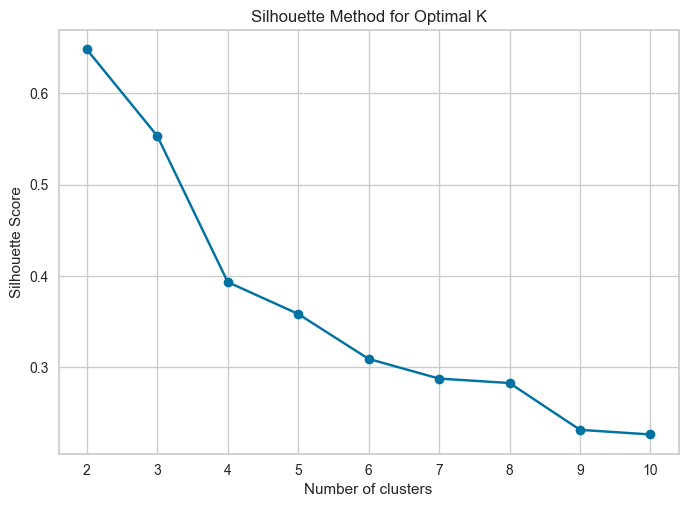

In [115]:
#Silhouette scores
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df_encoded_sample = df_encoded.sample(n=10000, random_state=0)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)  # Set n_init ke 'auto'
    labels = kmeans.fit_predict(df_encoded_sample)
    silhouette_scores.append(silhouette_score(df_encoded_sample, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()

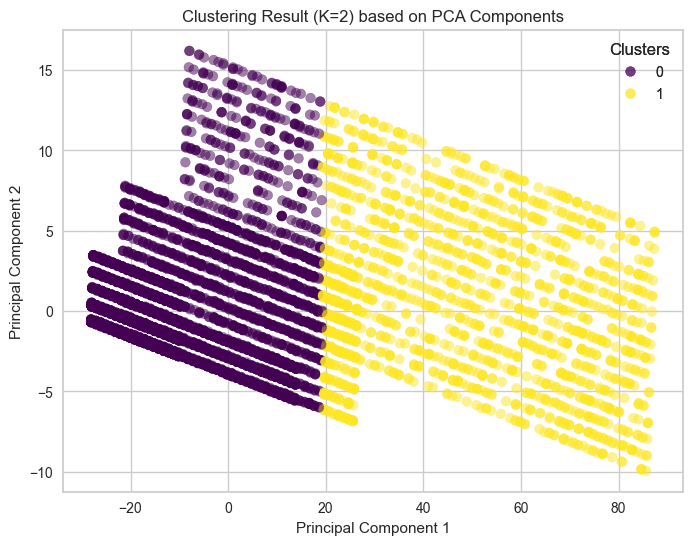

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Inisialisasi KMeans dengan jumlah cluster optimal berdasarkan Silhouette score
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)
labels = kmeans.fit_predict(df_encoded_sample)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))

# PCA untuk mereduksi dimensi ke 2 untuk visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded_sample)

# Plot data points dengan warna berdasarkan label cluster
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Result (K=2) based on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Menampilkan legend untuk label cluster
legend1 = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.gca().add_artist(legend1)

plt.show()

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Tambahkan kolom cluster_label ke DataFrame df_encoded_sample
df_encoded_sample['cluster_label'] = labels

# Melihat data pada cluster 0
cluster_0_data = df_encoded_sample[df_encoded_sample['cluster_label'] == 0]

# Melihat data pada cluster 1
cluster_1_data = df_encoded_sample[df_encoded_sample['cluster_label'] == 1]

# Contoh visualisasi atau analisis lebih lanjut
# Misalnya, mencetak beberapa baris data dari masing-masing cluster
print("Cluster 0:")
print(cluster_0_data.head())

print("\nCluster 1:")
print(cluster_1_data.head())


Cluster 0:
        tipe_agunan  kondisi_agunan  kemudahan_dijual_kembali  \
390058     0.814498       -1.497089                 -0.760987   
303676     0.814498        1.500532                 -0.760987   
66570     -1.227750       -1.497089                  0.129088   
198087     0.814498        0.501325                  0.129088   
425659    -1.227750       -0.997486                 -0.760987   

        status_lunas_agunan  agunan_dibanyak_pinjaman  \
390058             0.997473                   0.99933   
303676             0.997473                   0.99933   
66570              0.997473                  -1.00067   
198087             0.997473                  -1.00067   
425659            -1.002533                   0.99933   

        kesediaan_untuk_digadaikan  jenis_asset_bergerak_atau_tidak  \
390058                     1.00075                        -1.000654   
303676                     1.00075                         0.999346   
66570                      1.00075        

In [118]:
df_baru_original['cluster'] = df_encoded_sample['cluster_label']
df_baru_original = df_baru_original.dropna()
# Map cluster labels to 'terima' and 'tolak' based on the assumption
cluster_mapping = {0: 'tidak layak', 1: 'layak'}

# Apply the mapping to the DataFrame
df_baru_original['cluster_label'] = df_baru_original['cluster'].map(cluster_mapping)
df_baru_original

,pekerjaan,tujuan_pinjaman,agunan,tipe_agunan,status_agunan_terburuk,kondisi_agunan,asuransi_agunan,status_lunas_agunan,jumlah_agunan,nilai_agunan,...,kesediaan_untuk_digadaikan,jenis_asset_bergerak_atau_tidak,aset_maya,riwayat_agunan_sebelumnya,kemudahan_dijual_kembali,kenaikan_nilai_property_agunan,status_kepemilikan_asset,surat_berharga,cluster,cluster_label
61,Tidak_Bekerja,Tempat Tinggal,Bangunan,Berwujud,0.0,Meragukan,True,Belum Lunas,9.0,63719374.0,...,Ya,Tidak,-1.0,Pernah,Cukup,15.0,Non-Pribadi,1.0,1.0,layak
117,Staf_Lainnya,Tempat Tinggal,Bangunan,Berwujud,0.0,Meragukan,True,Belum Lunas,9.0,37100827.0,...,Ya,Tidak,-1.0,Pernah,Meragukan,5.0,Pribadi,1.0,0.0,tidak layak
168,Ibu_Rumah_Tangga,Tempat Tinggal,Surat Berharga,Tak berwujud,0.0,Lemah,True,Belum Lunas,2.0,130835.0,...,Ya,Ya,0.0,Pernah,Meragukan,16.0,Non-Pribadi,1.0,0.0,tidak layak
244,Pelajar,Gaya Hidup,Hak Kekayaan Intelektual,Tak berwujud,0.0,Resiko Tinggi,False,Belum Lunas,6.0,21400940.0,...,Tidak,Tidak,-1.0,Pernah,Kuat,0.0,Pribadi,1.0,0.0,tidak layak
270,Wartawan/Reporter/Jurnalis/Editor,Bisnis/Usaha,Tanah,Berwujud,0.0,Lemah,True,Lunas,9.0,63113860.0,...,Tidak,Ya,1.0,Tidak Pernah,Kuat,11.0,Non-Pribadi,1.0,0.0,tidak layak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499684,Notaris,Gaya Hidup,Rumah,Berwujud,0.0,Sangat Kuat,True,Lunas,2.0,541374.0,...,Tidak,Ya,2.0,Pernah,Cukup,14.0,Non-Pribadi,1.0,0.0,tidak layak
499730,Manager/eksekutif,Bisnis/Usaha,Rekening Tabungan dan Deposito,Berwujud,0.0,Sangat Lemah,True,Lunas,10.0,2968123.0,...,Ya,Ya,2.0,Tidak Pernah,Meragukan,13.0,Non-Pribadi,1.0,1.0,layak
499777,Manager/eksekutif,Bisnis/Usaha,Asuransi Jiwa,Tak berwujud,0.0,Sangat Kuat,True,Belum Lunas,8.0,68560619.0,...,Tidak,Tidak,1.0,Pernah,Resiko Tinggi,9.0,Pribadi,1.0,1.0,layak
499921,Staf_bagian_penagihan_kredit_di_bank,Kesehatan,Piutang Usaha,Tak berwujud,0.0,Sangat Lemah,False,Belum Lunas,7.0,8345674.0,...,Tidak,Tidak,2.0,Tidak Pernah,Cukup,11.0,Non-Pribadi,1.0,0.0,tidak layak


In [119]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

# Kolom-kolom untuk ordinal encoding
ordinal_columns = ['tipe_agunan', 'kondisi_agunan', 'kemudahan_dijual_kembali', 'status_lunas_agunan',
                   'agunan_dibanyak_pinjaman', 'kesediaan_untuk_digadaikan', 'jenis_asset_bergerak_atau_tidak',
                   'riwayat_agunan_sebelumnya', 'status_kepemilikan_asset', 'asuransi_agunan']

# Kolom-kolom untuk label encoding
nominal_columns = ['pekerjaan', 'tujuan_pinjaman', 'agunan', 'merk_aset']

# Mapping untuk ordinal encoding
categories = {
    'tipe_agunan': ['Tak berwujud', 'Berwujud'],
    'kondisi_agunan': ['Resiko Tinggi', 'Sangat Lemah', 'Lemah', 'Meragukan', 'Cukup', 'Kuat', 'Sangat Kuat'],
    'kemudahan_dijual_kembali': ['Resiko Tinggi', 'Sangat lemah', 'Lemah', 'Meragukan', 'Cukup', 'Kuat', 'Sangat Kuat'],
    'status_lunas_agunan': ['Belum Lunas', 'Lunas'],
    'agunan_dibanyak_pinjaman': ['Tidak', 'Ya'],
    'kesediaan_untuk_digadaikan': ['Tidak', 'Ya'],
    'jenis_asset_bergerak_atau_tidak': ['Tidak', 'Ya'],
    'riwayat_agunan_sebelumnya': ['Tidak Pernah', 'Pernah'],
    'status_kepemilikan_asset': ['Non-Pribadi', 'Pribadi'],
    'asuransi_agunan': [False, True],
}

# Buat ordinal encoder dengan mapping categories dan menangani unknown values
ordinal_encoder = OrdinalEncoder(
    categories=[categories[col] for col in ordinal_columns],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

# Custom transformer untuk Label Encoding kolom nominal
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in self.columns}
        return self
    
    def transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].transform(X[col])
        return output

label_encoder = MultiColumnLabelEncoder(columns=nominal_columns)

# Column transformer untuk menggabungkan kedua jenis encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_columns),
        ('nom', label_encoder, nominal_columns)
    ],
    remainder='passthrough'  # Menambahkan kolom lainnya ke hasil akhir
)

# Transform data
df_akhir = preprocessor.fit_transform(df_baru_original)

# Mendapatkan nama kolom untuk hasil encoding
ordinal_feature_names = ordinal_columns
nominal_feature_names = nominal_columns

# Menggabungkan nama kolom hasil encoding dengan kolom lainnya
feature_names = ordinal_feature_names + nominal_feature_names + ['status_agunan_terburuk', 'jumlah_agunan', 'nilai_agunan',
                                                                 'tenor', 'usia_agunan', 'aset_maya', 'kenaikan_nilai_property_agunan',
                                                                 'surat_berharga', 'cluster', 'cluster_label']

# Konversi kembali menjadi DataFrame dengan nama kolom yang dihasilkan
df_akhir = pd.DataFrame(df_akhir, columns=feature_names)

print(df_akhir)

# Menyimpan ordinal encoder
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder, f)

# Menyimpan label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Menyimpan mapping kategori untuk ordinal encoder
with open('ordinal_mappings.pkl', 'wb') as f:
    pickle.dump(categories, f)

     tipe_agunan kondisi_agunan kemudahan_dijual_kembali status_lunas_agunan  \
0            1.0            3.0                      4.0                 0.0   
1            1.0            3.0                      3.0                 0.0   
2            0.0            2.0                      3.0                 0.0   
3            0.0            0.0                      5.0                 0.0   
4            1.0            2.0                      5.0                 1.0   
...          ...            ...                      ...                 ...   
9995         1.0            6.0                      4.0                 1.0   
9996         1.0            1.0                      3.0                 1.0   
9997         0.0            6.0                      0.0                 0.0   
9998         0.0            1.0                      4.0                 0.0   
9999         0.0            2.0                      4.0                 0.0   

     agunan_dibanyak_pinjaman kesediaan

# Data Modelling

In [120]:
df_akhir

,tipe_agunan,kondisi_agunan,kemudahan_dijual_kembali,status_lunas_agunan,agunan_dibanyak_pinjaman,kesediaan_untuk_digadaikan,jenis_asset_bergerak_atau_tidak,riwayat_agunan_sebelumnya,status_kepemilikan_asset,asuransi_agunan,...,status_agunan_terburuk,jumlah_agunan,nilai_agunan,tenor,usia_agunan,aset_maya,kenaikan_nilai_property_agunan,surat_berharga,cluster,cluster_label
0,1.0,3.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,9.0,63719374.0,75,7,-1.0,15.0,1.0,1.0,layak
1,1.0,3.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,9.0,37100827.0,37,20,-1.0,5.0,1.0,0.0,tidak layak
2,0.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,2.0,130835.0,27,11,0.0,16.0,1.0,0.0,tidak layak
3,0.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,6.0,21400940.0,24,2,-1.0,0.0,1.0,0.0,tidak layak
4,1.0,2.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,9.0,63113860.0,12,6,1.0,11.0,1.0,0.0,tidak layak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,6.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,2.0,541374.0,24,2,2.0,14.0,1.0,0.0,tidak layak
9996,1.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,10.0,2968123.0,55,4,2.0,13.0,1.0,1.0,layak
9997,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,8.0,68560619.0,55,5,1.0,9.0,1.0,1.0,layak
9998,0.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,8345674.0,18,1,2.0,11.0,1.0,0.0,tidak layak


In [121]:
df_akhir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tipe_agunan                      10000 non-null  object
 1   kondisi_agunan                   10000 non-null  object
 2   kemudahan_dijual_kembali         10000 non-null  object
 3   status_lunas_agunan              10000 non-null  object
 4   agunan_dibanyak_pinjaman         10000 non-null  object
 5   kesediaan_untuk_digadaikan       10000 non-null  object
 6   jenis_asset_bergerak_atau_tidak  10000 non-null  object
 7   riwayat_agunan_sebelumnya        10000 non-null  object
 8   status_kepemilikan_asset         10000 non-null  object
 9   asuransi_agunan                  10000 non-null  object
 10  pekerjaan                        10000 non-null  object
 11  tujuan_pinjaman                  10000 non-null  object
 12  agunan                           

In [122]:
df_final = pd.DataFrame(df_akhir)

# Kolom-kolom untuk ordinal encoding
ordinal_columns = ['tipe_agunan', 'kondisi_agunan', 'kemudahan_dijual_kembali', 'status_lunas_agunan',
                   'agunan_dibanyak_pinjaman', 'kesediaan_untuk_digadaikan', 'jenis_asset_bergerak_atau_tidak',
                   'riwayat_agunan_sebelumnya', 'status_kepemilikan_asset', 'asuransi_agunan']

# Kolom-kolom untuk label encoding
nominal_columns = ['pekerjaan', 'tujuan_pinjaman', 'agunan', 'merk_aset']

# Kolom-kolom numerik yang masih bertipe object
numeric_columns = ['status_agunan_terburuk', 'jumlah_agunan', 'nilai_agunan', 'tenor', 'usia_agunan', 'aset_maya',
                   'kenaikan_nilai_property_agunan', 'surat_berharga', 'cluster']

# Konversi kolom ordinal yang telah di-encode
for col in ordinal_columns:
    df_final[col] = pd.to_numeric(df_final[col])

# Inisialisasi LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Konversi kolom-kolom nominal
for col in nominal_columns:
    df_final[col] = label_encoder.fit_transform(df_final[col])

# Konversi ke tipe data numerik
for col in nominal_columns:
    df_final[col] = df_final[col].astype(int)

# Konversi kolom-kolom numerik yang masih bertipe object
for col in numeric_columns:
    df_final[col] = pd.to_numeric(df_final[col])

In [123]:
# Periksa kembali tipe data setelah konversi
print(df_final.info())
print(df_final)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tipe_agunan                      10000 non-null  float64
 1   kondisi_agunan                   10000 non-null  float64
 2   kemudahan_dijual_kembali         10000 non-null  float64
 3   status_lunas_agunan              10000 non-null  float64
 4   agunan_dibanyak_pinjaman         10000 non-null  float64
 5   kesediaan_untuk_digadaikan       10000 non-null  float64
 6   jenis_asset_bergerak_atau_tidak  10000 non-null  float64
 7   riwayat_agunan_sebelumnya        10000 non-null  float64
 8   status_kepemilikan_asset         10000 non-null  float64
 9   asuransi_agunan                  10000 non-null  float64
 10  pekerjaan                        10000 non-null  int32  
 11  tujuan_pinjaman                  10000 non-null  int32  
 12  agunan             

In [124]:
df_final = df_final.drop(columns=['cluster'])

In [125]:
# Hitung nilai unik dan jumlah kemunculannya
cluster_label_counts = df_final['cluster_label'].value_counts()

print(cluster_label_counts)

cluster_label
tidak layak    8308
layak          1692
Name: count, dtype: int64


In [126]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Misalkan df_final adalah DataFrame Anda
# Memisahkan fitur dan target

X = df_final.drop(columns=['cluster_label'])
y = df_final['cluster_label']

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menggabungkan kembali menjadi DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['cluster_label'] = y_resampled

# Memeriksa distribusi kelas setelah resampling
print(df_resampled['cluster_label'].value_counts())


cluster_label
layak          8308
tidak layak    8308
Name: count, dtype: int64


In [127]:
df_resampled

,tipe_agunan,kondisi_agunan,kemudahan_dijual_kembali,status_lunas_agunan,agunan_dibanyak_pinjaman,kesediaan_untuk_digadaikan,jenis_asset_bergerak_atau_tidak,riwayat_agunan_sebelumnya,status_kepemilikan_asset,asuransi_agunan,...,merk_aset,status_agunan_terburuk,jumlah_agunan,nilai_agunan,tenor,usia_agunan,aset_maya,kenaikan_nilai_property_agunan,surat_berharga,cluster_label
0,1.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,6,0.0,9.000000,6.371937e+07,75,7,-1.000000,15.000000,1.0,layak
1,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,5,0.0,9.000000,3.710083e+07,37,20,-1.000000,5.000000,1.0,tidak layak
2,0.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,6,0.0,2.000000,1.308350e+05,27,11,0.000000,16.000000,1.0,tidak layak
3,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,4,0.0,6.000000,2.140094e+07,24,2,-1.000000,0.000000,1.0,tidak layak
4,1.000000,2.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2,0.0,9.000000,6.311386e+07,12,6,1.000000,11.000000,1.0,tidak layak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16611,0.000000,1.052348,1.895303,0.052348,0.052348,0.947652,0.052348,0.052348,0.947652,0.052348,...,6,0.0,9.895303,9.466082e+07,59,12,1.052348,5.209393,1.0,layak
16612,0.631323,5.000000,3.787935,0.000000,0.000000,1.000000,0.000000,0.631323,0.000000,0.000000,...,6,0.0,7.419258,3.234773e+06,114,11,0.262645,11.843387,1.0,layak
16613,1.000000,1.020181,5.000000,1.000000,0.010090,1.000000,1.000000,0.010090,0.010090,1.000000,...,0,0.0,9.939458,2.485989e+06,56,8,1.979819,2.050452,1.0,layak
16614,0.689157,2.243371,4.378314,0.000000,0.000000,0.310843,0.000000,0.000000,1.000000,0.000000,...,5,0.0,3.000000,2.785647e+08,80,11,0.378314,14.580730,1.0,layak


In [128]:
from sklearn.model_selection import train_test_split
from pycaret.classification import *
import pandas as pd
from sklearn.metrics import classification_report

# Pisahkan data
X = df_resampled.drop(columns=['cluster_label'])
y = df_resampled['cluster_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup
clf = setup(data=pd.concat([X_train, y_train], axis=1), target='cluster_label', session_id=42)





,Description,Value
0,Session id,42
1,Target,cluster_label
2,Target type,Binary
3,Target mapping,"layak: 0, tidak layak: 1"
4,Original data shape,"(13292, 23)"
5,Transformed data shape,"(13292, 23)"
6,Transformed train set shape,"(9304, 23)"
7,Transformed test set shape,"(3988, 23)"
8,Numeric features,22
9,Preprocess,True


In [129]:
# Bandingkan semua model
best_models = compare_models(n_select=10, fold=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9996,1.0000,0.9996,0.9996,0.9996,0.9991,0.9991,0.2040
dt,Decision Tree Classifier,0.9994,0.9994,0.9994,0.9994,0.9994,0.9987,0.9987,0.4080
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9991,0.9991,0.9991,0.9983,0.9983,0.5820
xgboost,Extreme Gradient Boosting,0.9991,1.0000,0.9991,0.9991,0.9991,0.9983,0.9983,0.1240
ada,Ada Boost Classifier,0.9987,1.0000,0.9987,0.9987,0.9987,0.9974,0.9974,0.1800
rf,Random Forest Classifier,0.9984,1.0000,0.9984,0.9984,0.9984,0.9968,0.9968,0.1460
et,Extra Trees Classifier,0.9930,0.9998,0.9930,0.9930,0.9930,0.9860,0.9861,0.1200
ridge,Ridge Classifier,0.9819,0.9990,0.9819,0.9823,0.9819,0.9639,0.9643,0.0340
lda,Linear Discriminant Analysis,0.9819,0.9990,0.9819,0.9823,0.9819,0.9639,0.9643,0.0340
lr,Logistic Regression,0.6880,0.8601,0.6880,0.6886,0.6232,0.3763,0.4150,1.1000


In [130]:
# Pilih model yang diinginkan
selected_models = [best_models[8], best_models[9]]  # Ganti dengan model yang Anda pilih

# Finalisasi dan simpan model
for model in selected_models:
    final_model = finalize_model(model)
    model_name = str(model).split('(')[0]  # Ambil nama model
    save_model(final_model, model_name)  # Simpan model dengan nama model
    print(f'Model {model_name} berhasil disimpan.')
    
    # Prediksi di data uji
    test_predictions = predict_model(final_model, data=X_test)
    
    # Evaluasi hasil
    print(classification_report(y_test, test_predictions['prediction_label']))

Transformation Pipeline and Model Successfully Saved
Model LinearDiscriminantAnalysis berhasil disimpan.


              precision    recall  f1-score   support

       layak       0.97      0.99      0.98      1666
 tidak layak       0.99      0.97      0.98      1658

    accuracy                           0.98      3324
   macro avg       0.98      0.98      0.98      3324
weighted avg       0.98      0.98      0.98      3324

Transformation Pipeline and Model Successfully Saved
Model LogisticRegression berhasil disimpan.


              precision    recall  f1-score   support

       layak       0.50      1.00      0.67      1666
 tidak layak       0.00      0.00      0.00      1658

    accuracy                           0.50      3324
   macro avg       0.25      0.50      0.33      3324
weighted avg       0.25      0.50      0.33      3324



In [131]:
from pycaret.classification import load_model, predict_model

# Memuat model yang disimpan
model_name = 'LinearDiscriminantAnalysis'  # Ganti dengan nama model yang sesuai
loaded_model = load_model(model_name)

# Misalnya, jika Anda ingin memprediksi 5 baris pertama dari df_resample
predictions = predict_model(loaded_model, data=X_test)

# Tampilkan hasil prediksi
print(predictions)  # Tampilkan label dan skor untuk 5 baris pertama


Transformation Pipeline and Model Successfully Loaded


       tipe_agunan  kondisi_agunan  kemudahan_dijual_kembali  \
14719     0.000000        4.358380                  1.566480   
2126      1.000000        3.000000                  5.000000   
6849      1.000000        2.000000                  5.000000   
4045      1.000000        3.000000                  0.000000   
13617     0.762949        1.185256                 -0.288847   
...            ...             ...                       ...   
10280     0.807702        0.000000                 -0.230809   
7581      1.000000        2.000000                  5.000000   
15413     0.994813        0.031122                  2.005187   
15101     1.000000        2.078518                  1.078518   
866       0.000000        2.000000                  4.000000   

       status_lunas_agunan  agunan_dibanyak_pinjaman  \
14719             0.000000                  0.641620   
2126              0.000000                  0.000000   
6849              1.000000                  0.000000   
4045   

In [132]:
# Simpan hasil prediksi ke dalam file CSV
predictions.to_csv('predictions.csv', index=False)

In [133]:
print("Kolom yang ada di DataFrame:", list(X_test.columns))
print("Kolom yang diharapkan:", ['tipe_agunan', 'kondisi_agunan', 'kemudahan_dijual_kembali', 'status_lunas_agunan', 'agunan_dibanyak_pinjaman', 'kesediaan_untuk_digadaikan', 'jenis_asset_bergerak_atau_tidak', 'riwayat_agunan_sebelumnya', 'status_kepemilikan_asset', 'asuransi_agunan', 'pekerjaan', 'tujuan_pinjaman', 'agunan', 'merk_aset', 'status_agunan_terburuk', 'jumlah_agunan', 'nilai_agunan', 'tenor', 'usia_agunan', 'aset_maya', 'kenaikan_nilai_property_agunan', 'surat_berharga', 'cluster'])


Kolom yang ada di DataFrame: ['tipe_agunan', 'kondisi_agunan', 'kemudahan_dijual_kembali', 'status_lunas_agunan', 'agunan_dibanyak_pinjaman', 'kesediaan_untuk_digadaikan', 'jenis_asset_bergerak_atau_tidak', 'riwayat_agunan_sebelumnya', 'status_kepemilikan_asset', 'asuransi_agunan', 'pekerjaan', 'tujuan_pinjaman', 'agunan', 'merk_aset', 'status_agunan_terburuk', 'jumlah_agunan', 'nilai_agunan', 'tenor', 'usia_agunan', 'aset_maya', 'kenaikan_nilai_property_agunan', 'surat_berharga']
Kolom yang diharapkan: ['tipe_agunan', 'kondisi_agunan', 'kemudahan_dijual_kembali', 'status_lunas_agunan', 'agunan_dibanyak_pinjaman', 'kesediaan_untuk_digadaikan', 'jenis_asset_bergerak_atau_tidak', 'riwayat_agunan_sebelumnya', 'status_kepemilikan_asset', 'asuransi_agunan', 'pekerjaan', 'tujuan_pinjaman', 'agunan', 'merk_aset', 'status_agunan_terburuk', 'jumlah_agunan', 'nilai_agunan', 'tenor', 'usia_agunan', 'aset_maya', 'kenaikan_nilai_property_agunan', 'surat_berharga', 'cluster']


In [134]:
test_data = pd.DataFrame({
    'tipe_agunan': [1.0],
    'kondisi_agunan': [3.0],
    'kemudahan_dijual_kembali': [1.0],
    'status_lunas_agunan': [1.0],
    'agunan_dibanyak_pinjaman': [0.0],
    'kesediaan_untuk_digadaikan': [0.0],
    'jenis_asset_bergerak_atau_tidak': [0.0],
    'riwayat_agunan_sebelumnya': [1.0],
    'status_kepemilikan_asset': [-1.0],
    'asuransi_agunan': [-1.0],
    'pekerjaan': [28],
    'tujuan_pinjaman': [4],
    'agunan': [1],
    'merk_aset': [6],
    'status_agunan_terburuk': [0.0],
    'jumlah_agunan': [3.0],
    'nilai_agunan': [418476056.0],
    'tenor': [58],
    'usia_agunan': [16],
    'aset_maya': [2.0],
    'kenaikan_nilai_property_agunan': [13.0],
    'surat_berharga': [1.0]
})
prediction = model.predict(test_data)
print("Prediksi dengan data dummy:", prediction)


Prediksi dengan data dummy: [1]


In [135]:
# Simpan hasil prediksi ke dalam file CSV
df_baru_original.to_csv('df_baru_original.csv', index=False)